In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## Processus d'EDA

In [2]:
df=pd.read_csv('../data/Test.csv')
print("Apercu des donnees")    Il représente un point où la courbe commence à s'aplatir.

    Il est aligné avec le nombre de segments pré-existants dans les données, ce qui nous permettra de comparer nos résultats à une "réalité".

    C'est un nombre de segments gérable d'un point de vue business.

Tu peux donc continuer en toute confiance avec optimal_k = 4. Ton raisonnement est solide. Tu as utilisé la méthode du coude non pas comme une règle absolue, mais comme un outil d'aide à la décision, ce qui est exactement la bonne démarche.

Continue avec la suite (Cellules 9 et 10) pour l'entraînement final et la visualisation avec PCA.

display(df.head())

df.info()
print(f"Le nombre de lignes du jeu de donnees: {df.shape[0]}")

Apercu des donnees


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB
Le nombre de lignes du jeu de donnees: 2627


In [3]:
# Suppression des colonnes inutiles pour le clustering(ID, Var_1, Segmentation)
df_processed=df.copy()

df_processed=df_processed.drop(['ID', 'Var_1', 'Segmentation'], axis=1)

print("Colonnes conservees pour le clustering : ")
print(df_processed.columns)

Colonnes conservees pour le clustering : 
Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')


In [4]:
#Gestion des valeurs manquantes (categorielles -- mode  & numeriques -- mediane)

#categorielle
for col in ['Ever_Married', 'Graduated', 'Profession']:
    mode_val= df_processed[col].mode()[0]
    df_processed[col] = df_processed[col].fillna(mode_val)

#numeriques
for col in ['Work_Experience', 'Family_Size']:
    median_val=df_processed[col].median()
    df_processed[col] = df_processed[col].fillna(median_val)
    
print("Nombre de valeurs manquantes apres imputation: ")
print(df_processed.isnull().sum())

Nombre de valeurs manquantes apres imputation: 
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64


In [5]:
# Gestion des variables categorielles

spending_map={'Low': 0, 'Average': 1, 'High': 2}
df_processed['Spending_Score']= df_processed['Spending_Score'].map(spending_map)

# Binarisation des variables(Gender, Profession(pour mettre de l'ordre))
categorical_cols=df_processed.select_dtypes(include=['object']).columns

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
display(df_processed.head())

print(f"\n Nouvelles dimensions du dataframe: {df_processed.shape}")

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,36,0.0,0,1.0,False,True,True,False,True,False,False,False,False,False,False
1,37,8.0,1,4.0,True,True,True,False,False,False,False,True,False,False,False
2,69,0.0,0,1.0,False,True,False,False,False,False,False,False,False,False,False
3,59,11.0,2,2.0,True,True,False,False,False,False,True,False,False,False,False
4,19,1.0,0,4.0,False,False,False,False,False,False,False,False,False,False,True



 Nouvelles dimensions du dataframe: (2627, 15)


In [6]:
# Mise a echelle des donnees

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df_scaled=pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)

print("\nApercu des donnees apres scaling: ")
display(df_scaled.head())

print("\nVerification: ")
display(df_scaled.describe())


Apercu des donnees apres scaling: 


,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-0.450948,-0.748105,-0.721759,-1.172097,-1.087983,0.820517,0.784615,-0.31854,3.182979,-0.359731,-0.267969,-0.435001,-0.179499,-0.303074,-0.210042
1,-0.391999,1.752242,0.635478,0.792450,0.919132,0.820517,0.784615,-0.31854,-0.314171,-0.359731,-0.267969,2.298845,-0.179499,-0.303074,-0.210042
2,1.494372,-0.748105,-0.721759,-1.172097,-1.087983,0.820517,-1.274510,-0.31854,-0.314171,-0.359731,-0.267969,-0.435001,-0.179499,-0.303074,-0.210042
3,0.904881,2.689872,1.992715,-0.517248,0.919132,0.820517,-1.274510,-0.31854,-0.314171,-0.359731,3.731774,-0.435001,-0.179499,-0.303074,-0.210042
4,-1.453083,-0.435562,-0.721759,0.792450,-1.087983,-1.218744,-1.274510,-0.31854,-0.314171,-0.359731,-0.267969,-0.435001,-0.179499,-0.303074,4.760952



Verification: 


,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
count,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03,2.627000e+03
mean,1.839243e-16,1.622861e-17,-3.651438e-17,-3.516199e-17,-7.979068e-17,1.541718e-16,-1.271241e-16,4.462868e-17,-2.975246e-17,-7.438114e-18,2.434292e-17,-5.409537e-18,-5.950491e-17,-8.114306e-17,8.114306e-18
std,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00
min,-1.512032e+00,-7.481054e-01,-7.217587e-01,-1.172097e+00,-1.087983e+00,-1.218744e+00,-1.274510e+00,-3.185396e-01,-3.141711e-01,-3.597314e-01,-2.679691e-01,-4.350010e-01,-1.794994e-01,-3.030738e-01,-2.100420e-01
25%,-8.046430e-01,-7.481054e-01,-7.217587e-01,-5.172484e-01,-1.087983e+00,-1.218744e+00,-1.274510e+00,-3.185396e-01,-3.141711e-01,-3.597314e-01,-2.679691e-01,-4.350010e-01,-1.794994e-01,-3.030738e-01,-2.100420e-01
50%,-1.562028e-01,-4.355620e-01,-7.217587e-01,-5.172484e-01,9.191319e-01,8.205172e-01,7.846153e-01,-3.185396e-01,-3.141711e-01,-3.597314e-01,-2.679691e-01,-4.350010e-01,-1.794994e-01,-3.030738e-01,-2.100420e-01
75%,5.511865e-01,1.895248e-01,6.354783e-01,7.924495e-01,9.191319e-01,8.205172e-01,7.846153e-01,-3.185396e-01,-3.141711e-01,-3.597314e-01,-2.679691e-01,-4.350010e-01,-1.794994e-01,-3.030738e-01,-2.100420e-01
max,2.673354e+00,3.627502e+00,1.992715e+00,4.066694e+00,9.191319e-01,8.205172e-01,7.846153e-01,3.139327e+00,3.182979e+00,2.779852e+00,3.731774e+00,2.298845e+00,5.571049e+00,3.299527e+00,4.760952e+00


# Determination du nombre de clusters(La methode du coude)

In [7]:
from sklearn.cluster import KMeans

inertia=[]

k_range=range(1, 11)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)

    inertia.append(kmeans.inertia_)

print("Inertie pour chaque valeur de K: ")
print(inertia)

Inertie pour chaque valeur de K: 
[39404.999999999985, 33982.85886925607, 30793.92932112435, 28387.80619461175, 25550.908740926407, 22869.744782556212, 20294.309754670838, 19200.119726495468, 16955.956103738616, 13581.338375772213]


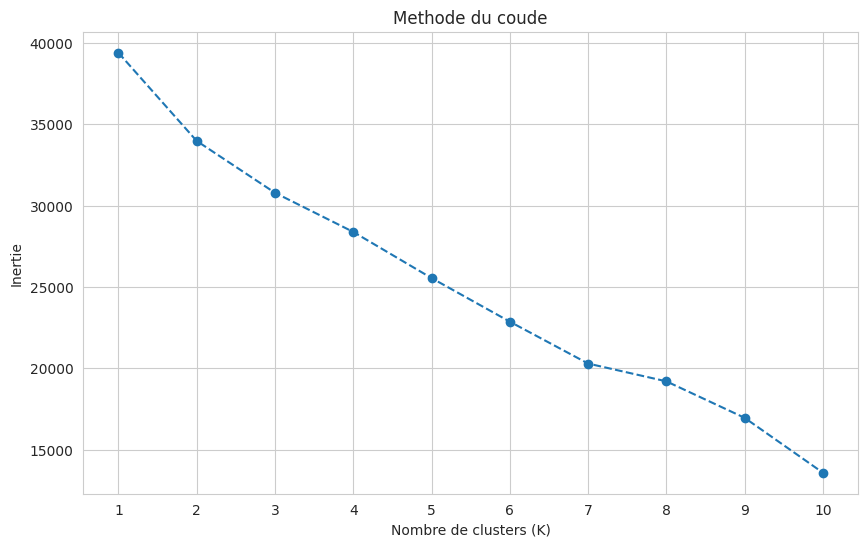

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Methode du coude')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# On constate que l'on a pas vraiment de coude et donc on va prendre K

# Application du clustering et visualisation

In [9]:
optimal_k=4

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_final.fit(df_scaled)

df_processed['Cluster'] = kmeans_final.labels_

print("Apercu des donnees avec les clusters assignes :")
display(df_processed.head())

print("\nTaille de chaque cluster :")
print(df_processed.head())

print("\nTaille de  chaque cluster :")
print(df_processed['Cluster'].value_counts())

Apercu des donnees avec les clusters assignes :


,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Cluster
0,36,0.0,0,1.0,False,True,True,False,True,False,False,False,False,False,False,0
1,37,8.0,1,4.0,True,True,True,False,False,False,False,True,False,False,False,0
2,69,0.0,0,1.0,False,True,False,False,False,False,False,False,False,False,False,0
3,59,11.0,2,2.0,True,True,False,False,False,False,True,False,False,False,False,0
4,19,1.0,0,4.0,False,False,False,False,False,False,False,False,False,False,True,1



Taille de chaque cluster :
   Age  Work_Experience  Spending_Score  Family_Size  Gender_Male  \
0   36              0.0               0          1.0        False   
1   37              8.0               1          4.0         True   
2   69              0.0               0          1.0        False   
3   59             11.0               2          2.0         True   
4   19              1.0               0          4.0        False   

   Ever_Married_Yes  Graduated_Yes  Profession_Doctor  Profession_Engineer  \
0              True           True              False                 True   
1              True           True              False                False   
2              True          False              False                False   
3              True          False              False                False   
4             False          False              False                False   

   Profession_Entertainment  Profession_Executive  Profession_Healthcare  \
0           

# Reduction de dimension

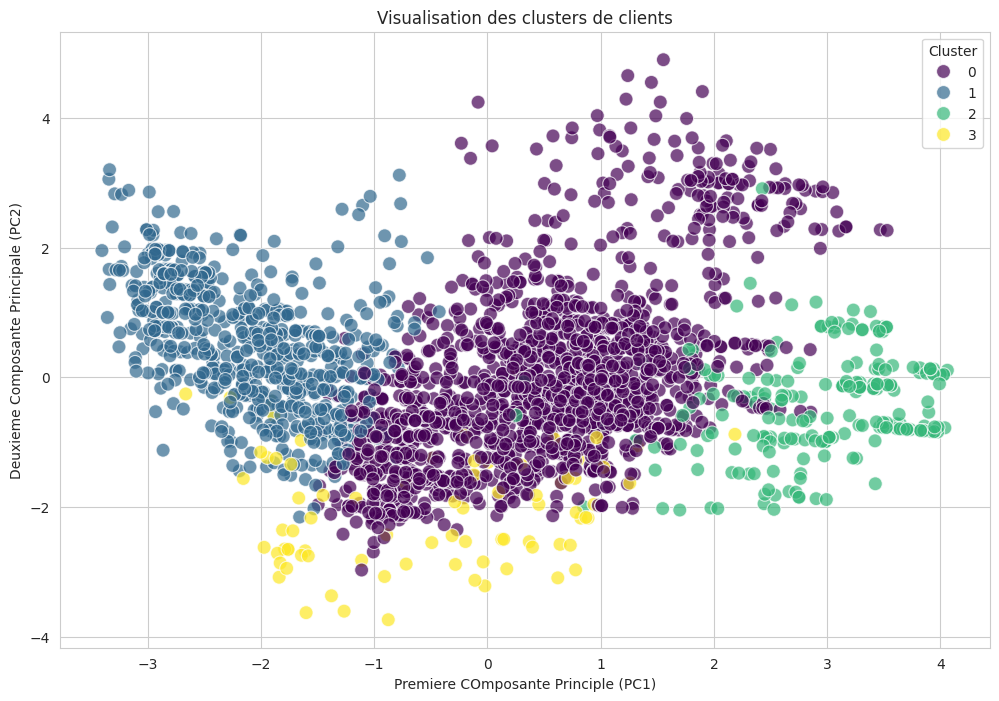

In [10]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2, random_state=42)

df_pca= pca.fit_transform(df_scaled)

df_pca=pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

df_pca['Cluster']=kmeans_final.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisation des clusters de clients')
plt.xlabel('Premiere COmposante Principle (PC1)')
plt.ylabel('Deuxieme Composante Principale (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
cluster_profile=df_processed.groupby("Cluster").mean()

print("Profil moyen des clusters: ")
display(cluster_profile)

Profil moyen des clusters: 


,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Cluster,,,,,,,,,,,,,,,
0,46.582672,2.427090,0.682123,2.533862,0.563148,0.777913,0.768151,0.094570,0.119585,0.167785,0.103112,0.016473,0.0,0.0,0.027456
1,26.986861,2.343066,0.007299,3.722628,0.551825,0.059854,0.283212,0.127007,0.058394,0.037956,0.010219,0.570803,0.0,0.0,0.096350
2,75.674208,1.217195,1.085973,1.995475,0.488688,0.936652,0.583710,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
3,37.914634,5.317073,0.414634,2.256098,0.182927,0.573171,0.536585,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000


## Analyse et Conclusion (Visualisation avec PCA)

En analysant le tableau de profil, nous pouvons définir des "personas" pour chaque segment de clientèle :

---

### **Cluster 0 : [Le Cœur du Marché : Professionnels Variés]**
C'est le groupe le plus large et le plus diversifié.
*   **Caractéristiques Clés :**
    *   **Âge :** 46.6 ans. En plein dans la force de l'âge.
    *   **Statut Marital :** Majoritairement mariés (78%).
    *   **Diplôme :**  Le groupe le plus diplômé (77%)
    *   **Dépenses :** Score de dépense moyen (Spending_Score = 0.68).
    *   **Profession :** Très diversifiée. On y trouve une bonne représentation d'ingénieurs (12%), d'artistes du divertissement (17%), de cadres (10%), etc. Aucune profession n'écrase les autres.
*   **Persona :** Ce segment représente la base la plus large et la plus stable de la clientèle. Ce sont des professionnels établis, avec un pouvoir d'achat correct et des besoins variés. C'est probablement le groupe cible pour la plupart des campagnes de marketing généralistes.

---

### **Cluster 1 : [Les Jeunes Célibataires du Secteur de la Santé]**
Ce groupe est clairement défini par sa jeunesse et son statut.
*   **Caractéristiques Clés :**
    *   **Âge :** 27 ans. C'est le groupe le plus jeune.
    *   **Statut Marital :** Massivement célibataires (seulement 6% sont mariés, Ever_Married_Yes = 0.06).
    *   **Diplôme :** Le groupe le moins diplômé (Graduated_Yes = 0.28). Ils sont probablement encore aux études ou viennent de les finir.
    *   **Taille de la Famille :**  Familles nombreuses (3.7 membres). Attention, *interprétation :* cela ne signifie pas qu'ils ont beaucoup d'enfants, mais plutôt qu'ils vivent encore probablement chez leurs parents.
    *   **Dépenses :** Score de dépense extrêmement bas (Spending_Score = 0.007). Ils ont très peu de pouvoir d'achat pour l'instant..
    *   **Profession :** Très forte concentration dans le secteur de la santé (Profession_Healthcare = 0.57).
*   **Persona :** Ce sont des jeunes (étudiants ou jeunes actifs) du domaine de la santé, vivant encore dans un cadre familial, célibataires et avec un budget très serré.

---

### **Cluster 2 : [Les Avocats Seniors Établis]**
C'est le cluster le plus facile à identifier et le plus distinct.
*   **Caractéristiques Clés :**
    *   **Âge :** 75.7 ans. C'est de très loin le groupe le plus âgé.
    *   **Expérience Professionnelle :** La plus élevée.
    *   **Dépenses :** Score de dépense moyen à élevé (Spending_Score = 1.09), ce qui est logique pour cette profession.
    *   **Statut Marital :** 93.7% sont mariés (Ever_Married_Yes), le taux le plus élevé.
    *   **Profession :** Profession_Lawyer est à 1.0. Cela signifie que 100% des membres de ce cluster sont des avocats. C'est une ségrégation parfaite !
    *   **Taille de la Famille :**  Petites familles (2 membres), ce qui correspond à des couples dont les enfants ont probablement quitté le foyer.
*   **Persona :** Ce sont des avocats expérimentés, en fin de carrière ou à la retraite, avec un pouvoir d'achat confortable et une situation familiale stable.

---

### **Cluster 3 : [Les Mères/Pères au Foyer en Milieu de Vie]**
*   **Caractéristiques Clés :**
    *   **Âge :** 37.9 ans, en plein milieu de la vie active.
    *   **Dépenses :** Score de dépense moyen-bas (Spending_Score = 0.41).
    *   **Profession :** Profession_Homemaker est à 1.0. 100% des membres sont des personnes au foyer.
    *   **Genre :** Très majoritairement féminin (seulement 18.3% d'hommes, Gender_Male = 0.18).
    *   **Taille de la Famille :** Familles de taille moyenne (2.25 membres).
*   **Persona :** Ce sont principalement des femmes au foyer, mariées pour la plupart (57%), qui gèrent le budget familial. Leurs dépenses sont probablement rationnelles et centrées sur la famille.

# Visualisation avec t-SNE

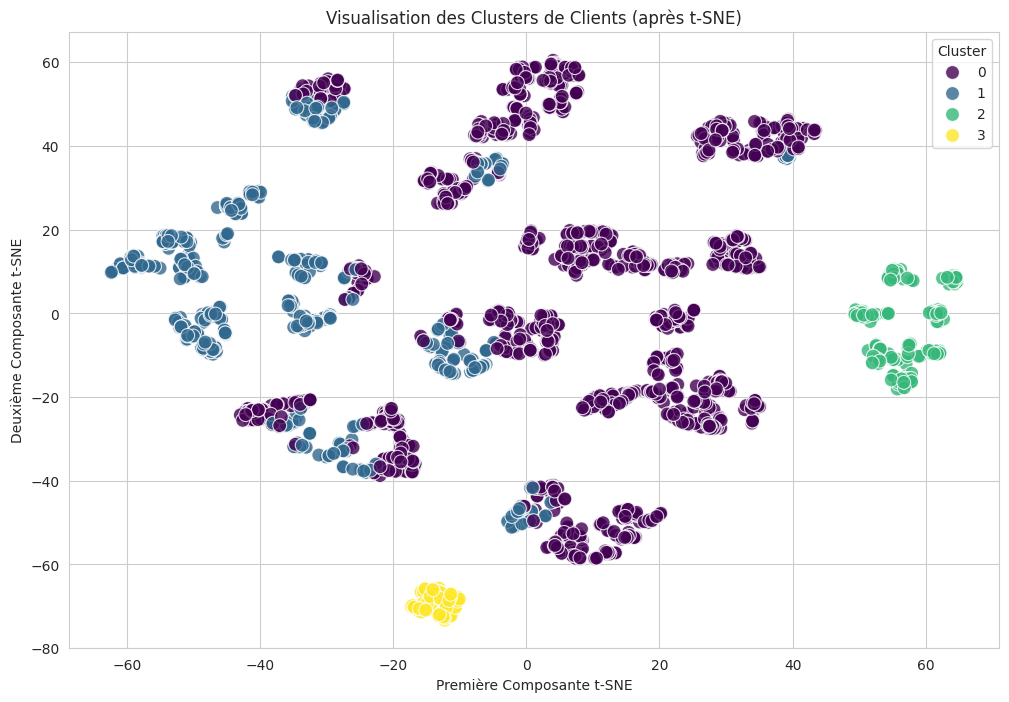

In [16]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)

df_tsne=tsne.fit_transform(df_scaled)

df_tsne=pd.DataFrame(data=df_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['Cluster']=kmeans_final.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', s=100,alpha=0.8)
plt.title('Visualisation des Clusters de Clients (après t-SNE)')
plt.xlabel('Première Composante t-SNE')
plt.ylabel('Deuxième Composante t-SNE')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Comparaison des Visualisations : PCA vs. t-SNE

- La **PCA** a montré une tendance générale à la séparation des groupes, mais avec un certain chevauchement. Elle est utile pour comprendre la variance globale des données.
- Le **t-SNE** a produit une visualisation avec des clusters beaucoup plus denses et visuellement distincts. C'est une méthode supérieure pour **confirmer l'existence** de groupes bien séparés et pour **communiquer les résultats** de manière convaincante.

**Conclusion Finale :**
Grâce au clustering, nous avons transformé une base de données brute en une segmentation client intelligente et actionnable. L'entreprise peut désormais cesser de s'adresser à tous ses clients de la même manière et développer des stratégies marketing sur-mesure pour chaque segment, optimisant ainsi ses investissements et améliorant la satisfaction client.